<a href="https://colab.research.google.com/github/tranquan687/Face-Smoothing/blob/main/Face_smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Create and expand mask by mediapipe

In [31]:
import mediapipe as mp
from mediapipe.python.solutions.drawing_utils import _normalized_to_pixel_coordinates
mp_face_mesh = mp.solutions.face_mesh
import time
from matplotlib import pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# import matplotlib.pyplot as plt


# Load drawing_utils and drawing_styles
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

In [32]:
FACEMESH_LIPS = [(61, 146), (146, 91), (91, 181), (181, 84), (84, 17),
                           (17, 314), (314, 405), (405, 321), (321, 375),
                           (375, 291),
                  (61, 185), (185, 40), (40, 39), (39, 37),
                           (37, 0), (0, 267),
                           (267, 269), (269, 270), (270, 409), (409, 291)]
                        #    (78, 95), (95, 88), (88, 178), (178, 87), (87, 14),
                        #    (14, 317), (317, 402), (402, 318), (318, 324),
                        #    (324, 308), (78, 191), (191, 80), (80, 81), (81, 82),
                        #    (82, 13), (13, 312), (312, 311), (311, 310),
                        #    (310, 415), (415, 308)]
 
FACEMESH_LEFT_EYE = [(263, 249), (249, 390), (390, 373), (373, 374),
                               (374, 380), (380, 381), (381, 382), (382, 362),
                               (263, 466), (466, 388), (388, 387), (387, 386),
                               (386, 385), (385, 384), (384, 398), (398, 362)]

# FACEMESH_LEFT_IRIS = frozenset([(474, 475), (475, 476), (476, 477),
#                                  (477, 474)])

FACEMESH_LEFT_EYEBROW = [(383,276),(276, 283), (283, 282), (282, 295),# trái trên 336
                                   (295, 285), 
                         (285,336),(336,296),(334,293),(293,300),(300,383)]
                        #  (300, 293), (293, 334),
                        #            (334, 296), (296, 336)]    

FACEMESH_RIGHT_EYE = [(33, 7), (7, 163), (163, 144), (144, 145),
                                (145, 153), (153, 154), (154, 155), (155, 133),
                                (33, 246), (246, 161), (161, 160), (160, 159),
                                (159, 158), (158, 157), (157, 173), (173, 133)]

FACEMESH_RIGHT_EYEBROW = [(156,46),(46, 53), (53, 52), (52, 65), (65, 55),
                          (55,107),(107,66),(66,105),(105,63),(63,70)]
                                    # (70, 63), (63, 105), (105, 66), (66, 107)]

# FACEMESH_RIGHT_IRIS = frozenset([(469, 470), (470, 471), (471, 472),
#                                  (472, 469)])

FACEMESH_FACE_OVAL = [(10, 338), (338, 297), (297, 332), (332, 284),
                                (284, 251), (251, 389), (389, 356), (356, 454),
                                (454, 323), (323, 361), (361, 288), (288, 397),
                                (397, 365), (365, 379), (379, 378), (378, 400),
                                (400, 377), (377, 152), (152, 148), (148, 176),
                                (176, 149), (149, 150), (150, 136), (136, 172),
                                (172, 58), (58, 132), (132, 93), (93, 234),
                                (234, 127), (127, 162), (162, 21), (21, 54),
                                (54, 103), (103, 67), (67, 109), (109, 10)]


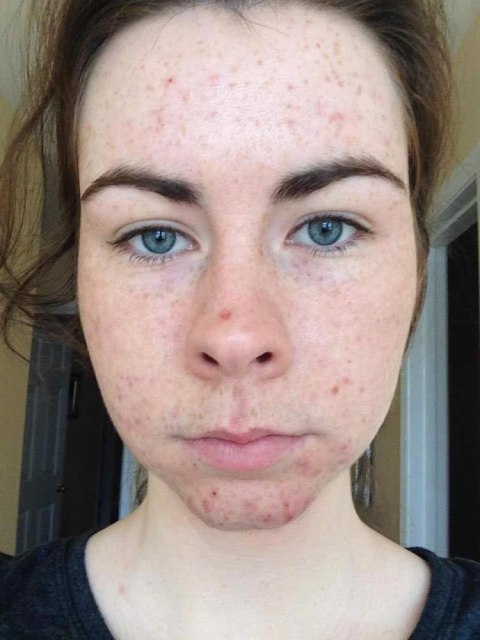

end of mediapie phase: 0.02661299705505371
start of create mask per face phase:
end of creat mask phase: 0.007287263870239258
total time: 0.0351254940032959


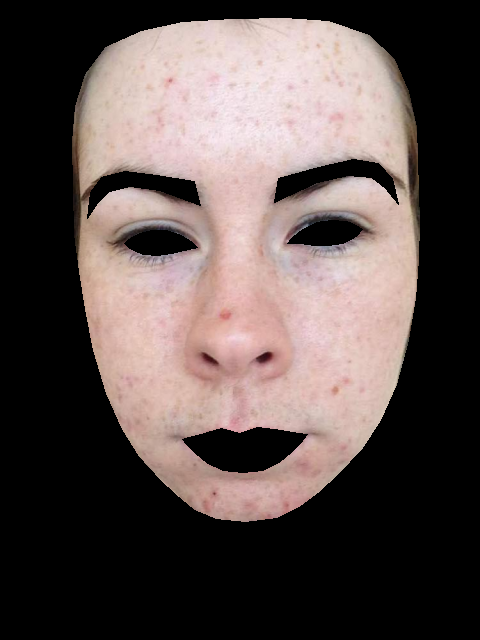

In [33]:
IMAGE_FILES = ['/content/drive/MyDrive/image/11_resized.png']
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=2, # num of face
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    cv2_imshow(image)
    start= time.time()

    # image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    # Convert the BGR image to RGB before processing.
    
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()

    print('end of mediapie phase:', time.time()-start)

    #create mask

    for face_landmarks in results.multi_face_landmarks:
        print('start of create mask per face phase:')

        start1 =time.time()
        # plt.axis('off');plt.imshow(annotated_image[:,:,::-1]);plt.show()
        idx_to_coordinates = {}
        for idx, landmark in enumerate(face_landmarks.landmark):
            if ((landmark.HasField('visibility') and
                    landmark.visibility < _VISIBILITY_THRESHOLD) or
                (landmark.HasField('presence') and
                    landmark.presence < _PRESENCE_THRESHOLD)):
                continue
            landmark_px = _normalized_to_pixel_coordinates(landmark.x, landmark.y,
                                                            image.shape[1], image.shape[0])
            if landmark_px:
                idx_to_coordinates[idx] = landmark_px


        face=[]
        lip=[]
        left_eye=[]
        right_eye=[]
        left_eyebrow=[]
        right_eyebrow=[]

        for connect in FACEMESH_FACE_OVAL:
            if idx_to_coordinates[connect[0]] not in face:
                face.append(idx_to_coordinates[connect[0]])
            if idx_to_coordinates[connect[1]] not in face:
                face.append(idx_to_coordinates[connect[1]])
        for connect in FACEMESH_LIPS:
            if idx_to_coordinates[connect[0]] not in face:
                lip.append(idx_to_coordinates[connect[0]])
            if idx_to_coordinates[connect[1]] not in face:
                lip.append(idx_to_coordinates[connect[1]])
        for connect in FACEMESH_LEFT_EYE :
            if idx_to_coordinates[connect[0]] not in face:
                left_eye.append(idx_to_coordinates[connect[0]])
            if idx_to_coordinates[connect[1]] not in face:
                left_eye.append(idx_to_coordinates[connect[1]])
        for connect in FACEMESH_LEFT_EYEBROW:
            if idx_to_coordinates[connect[0]] not in face:
                left_eyebrow.append(idx_to_coordinates[connect[0]])
            if idx_to_coordinates[connect[1]] not in face:
                left_eyebrow.append(idx_to_coordinates[connect[1]])

        for connect in FACEMESH_RIGHT_EYE :
            if idx_to_coordinates[connect[0]] not in face:
                right_eye.append(idx_to_coordinates[connect[0]])
            if idx_to_coordinates[connect[1]] not in face:
                right_eye.append(idx_to_coordinates[connect[1]])
        for connect in FACEMESH_RIGHT_EYEBROW:
            if idx_to_coordinates[connect[0]] not in face:
                right_eyebrow.append(idx_to_coordinates[connect[0]])
            if idx_to_coordinates[connect[1]] not in face:
                right_eyebrow.append(idx_to_coordinates[connect[1]])

        eye_lip_brow=np.zeros((image.shape[0], image.shape[1]))


        cv2.fillPoly(eye_lip_brow, [np.array(left_eye)], 255)
        cv2.fillPoly(eye_lip_brow, [np.array(right_eye)], 255)
        cv2.fillPoly(eye_lip_brow, [np.array(left_eyebrow)], 255)
        cv2.fillPoly(eye_lip_brow, [np.array(right_eyebrow)], 255)
        cv2.fillPoly(eye_lip_brow, [np.array(lip)], 255)



        upper_face=sorted(face, key = lambda x: x[1])
        upper={}
        for pt in upper_face[:13]:
            upper[pt]=(pt[0],max(pt[1]+(pt[1]-upper_face[-1][1])//6,0))
        for i in range(len(face)):
            if face[i] in list(upper.keys()):
                face[i]=upper[face[i]]


        face_oval=np.zeros((image.shape[0], image.shape[1]))


        cv2.fillPoly(face_oval, [np.array(face)], 255)

        mask = cv2.bitwise_xor(face_oval,eye_lip_brow, mask = None)
        print('end of creat mask phase:',time.time()-start1)

        print( 'total time:',time.time()-start)


        out = np.zeros_like(image)
        out[mask.astype(bool)] = image[mask.astype(bool)]
        # cv2.imwrite('crop.png',out)
        cv2_imshow(out)




smoothing skin by fast guided filter

filter phase: 0.02627706527709961


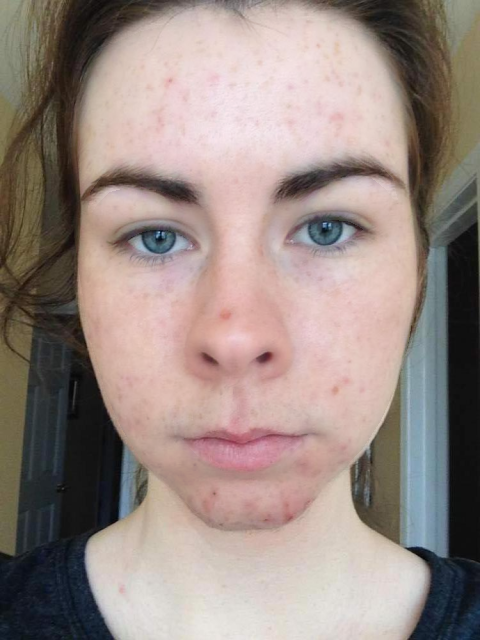

In [36]:
import cv2
import numpy as np
import time
import os

def fast_guided_filter_cv2(p, I, r, e,s):

    p_resized =cv2.resize(p,(p.shape[0]//s,p.shape[1]//s),interpolation= cv2.INTER_LINEAR)
    r_resized=r//s
    kernel = np.ones((r_resized,r_resized)) / (r_resized**2)
    mean_p = cv2.filter2D(p_resized, ddepth=-1, kernel=kernel ) 
    corr_Ip = cv2.filter2D(p_resized*p_resized, ddepth=-1, kernel=kernel )
    var_I = corr_Ip - mean_p*mean_p

    a = var_I / (var_I + e)
    b = mean_p - a * mean_p

    mean_a_resized = cv2.filter2D(a, ddepth=-1, kernel=kernel )
    mean_b_resized = cv2.filter2D(b, ddepth=-1, kernel=kernel )

    mean_a=cv2.resize(mean_a_resized,(p.shape[1],p.shape[0]),interpolation= cv2.INTER_LINEAR)
    mean_b=cv2.resize(mean_b_resized,(p.shape[1],p.shape[0]),interpolation= cv2.INTER_LINEAR)
  
    q = mean_a*I + mean_b

    return q
# process cho từng ảnh
# time_lst=[]
# a=5

# face=cv2.imread(r"./image_test/13_resized.png") # path chúa ảnh gốc
# face_crop=cv2.imread(r"./image_test/13_resized_crop.png") # path chứa ảnh sau khi áp mask
# mask=cv2.imread(r"./image_test/13_resized_expand_mask.png",cv2.IMREAD_GRAYSCALE)# path  mask
  
face = image
mask = mask 

#########################################################

# for i in range(1):
start= time.time() 
  
obj=fast_guided_filter_cv2(face,face,12,0.001*255*255,4) #(20,0.003,5) (30,0.004,5) (50,0.003,9)thay vien (15,0.002,5)
 
#########################################################
    ### phần này có thể tối ưu lại
mask=mask.astype(bool) # đổi thành boolen
inv_mask=np.logical_not(mask)
###
# merge ảnh sau khi filter vào ảnh gốc
inv_face=np.zeros_like(face)
inv_face[mask]=obj[mask]
# cv2_imshow(inv_face) 
bg=np.zeros_like(face)
bg[inv_mask]=face[inv_mask]
# cv2_imshow(bg) 

result= cv2.bitwise_or(inv_face,bg)
# time_lst.append(time.time()-start)
print('filter phase:',time.time()-start) #đo thời gian


cv2_imshow(result) 

# print('fastguided min time:',min(time_lst[1:]))
# print('fastguided max time:',max(time_lst[1:]))
# print('fastguided mean time:',np.mean(time_lst[1:]))
# cv2.waitKey(0)
